In [1]:
import pandas as pd

data = pd.read_csv('Amazon-Products.csv')

data.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [3]:
# describe data
data.describe()

# if describe() is not showing typical statistical measures, e.g. median, mean, min, max
# the dataset is containing mostly categorical or non-numerical data

,Unnamed: 0
count,551585.000000
mean,7006.200471
std,5740.835523
min,0.000000
25%,1550.000000
50%,5933.000000
75%,11482.000000
max,19199.000000


In [5]:
data.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


In [11]:
# identify missing values 
import pandas as pd

missing_values = data.isnull().sum()

# display col with missing values
print(missing_values[missing_values > 0])

print('----------------------------')

# display % of missing values for each col
missing_percentage = (missing_values / len(data)) * 100

print(missing_percentage[missing_percentage > 0])

ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64
----------------------------
ratings           31.870700
no_of_ratings     31.870700
discount_price    11.088590
actual_price       3.229421
dtype: float64


before deailing with missing values, theres a need to analyze the distribution of numerical column

Filling missing values is chosen over removing them to preserve data integrity and prevent loss of important information.
Mean imputation is used for normally distributed numerical data without outliers.
Median imputation is used for skewed numerical data with outliers.
Mode imputation is used for categorical data to ensure valid category values.

In [16]:
# while drawing distribution, we hit TypeError: Horizontal orientation requires numeric `x` variable.
# this occur in `no_of_ratings` col

# list of columns to analyse
columns_to_analyse = ['ratings', 'no_of_ratings','discount_price','actual_price']

# func to indentify non-numeric values in a column
def find_non_numeric(df, col):
    non_numeric = df[col][pd.to_numeric(df[col], errors='coerce').isna()]
    return non_numeric

# check for non-numeric in each of the col
for col in columns_to_analyse:
    non_numeric = find_non_numeric(data, col)
    if not non_numeric.empty:
        print(f'Non-numeric values found in {col}:')
        print(non_numeric)

Non-numeric values found in ratings:
24        NaN
50        NaN
57        NaN
69        NaN
73        NaN
         ... 
551551    Get
551569    NaN
551574    NaN
551577    NaN
551578    NaN
Name: ratings, Length: 182027, dtype: object
Non-numeric values found in no_of_ratings:
0                           2,255
1                           2,948
2                           1,206
5                           1,666
6                           1,097
                   ...           
551551    FREE Delivery by Amazon
551569                        NaN
551574                        NaN
551577                        NaN
551578                        NaN
Name: no_of_ratings, Length: 212556, dtype: object
Non-numeric values found in discount_price:
0         ₹32,999
1         ₹46,490
2         ₹34,490
3         ₹37,990
4         ₹34,490
           ...   
551580     ₹3,449
551581     ₹1,199
551582     ₹1,199
551583        NaN
551584     ₹1,039
Name: discount_price, Length: 551585, dtype: object
No

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


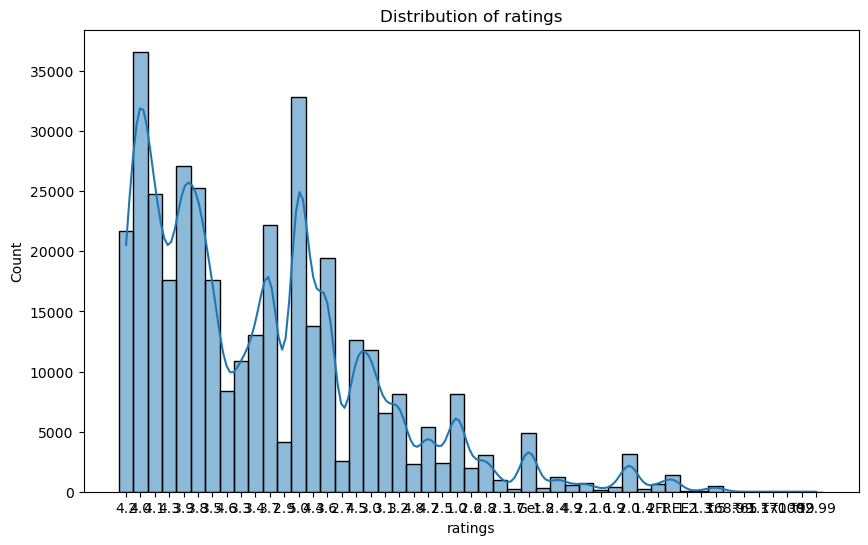

TypeError: Horizontal orientation requires numeric `x` variable.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# visualization
for col in columns_to_analyse:
    plt.figure(figsize = (10,6))
    sns.histplot(data[col], kde = True)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()